# Predicting Formula 1 Driver Points: A Data-Driven Approach to Performance Insights

In [2]:
# importing required libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")
from datetime import datetime
pd.set_option('display.max_columns', None)
# Importing necessary libraries for regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

The goal of my project is to predict driver points in Formula 1 races by focusing on factors that directly influence performance. I selected `results.csv` for detailed race outcomes, `status.csv` for insights into DNFs (Did Not Finish), `drivers.csv` for driver demographics, `races.csv` for race-specific context, `constructors.csv` for team-related performance, and `driver_standings.csv` for trends in season-long performance. These datasets provide a comprehensive yet focused view of the most relevant factors affecting driver points, while excluding less impactful or overly granular details like individual lap times and pit stops. This ensures a streamlined and efficient approach to analyzing and modeling the drivers' performance.

In [4]:
results = pd.read_csv('results.csv')
status = pd.read_csv('status.csv')
drivers= pd.read_csv('drivers.csv')
races = pd.read_csv('races.csv')
constructor = pd.read_csv('constructors.csv')
driver_standings = pd.read_csv('driver_standings.csv')

In [5]:
print(results.shape)
results.head()

(26719, 18)


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [6]:
print(status.shape)
status.head()

(139, 2)


,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [7]:
print(drivers.shape)
drivers.head()

(860, 9)


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [8]:
print(races.shape)
races.head()

(1125, 18)


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [9]:
print(constructor.shape)
constructor.head()

(212, 5)


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [10]:
print(driver_standings.shape)
driver_standings.head()

(34816, 7)


,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


Inner Join (how='inner'): This is the most common approach, which keeps only the rows that have matching values in all dataframes. It ensures that only the rows with valid relationships across all tables are kept

In [12]:
# Merge results with status using 'statusId'
df1 = pd.merge(results, status, on='statusId', how='inner')

# Merge df1 with drivers using 'driverId'
df2 = pd.merge(df1, drivers, on='driverId', how='inner')

# Merge df2 with races using 'raceId'
df3 = pd.merge(df2, races, on='raceId', how='inner')

# Merge df3 with constructor using 'constructorId'
df4 = pd.merge(df3, constructor, on='constructorId', how='inner')

# Merge df4 with driver_standings using 'raceId' and 'driverId'
df = pd.merge(df4, driver_standings, on=['raceId', 'driverId'], how='inner')

# Display the resulting dataframe
print(df.shape)
df.head()

(26250, 53)


,resultId,raceId,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,laps,time_x,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,status,driverRef,number_y,code,forename,surname,dob,nationality_x,url_x,year,round,circuitId,name_x,date,time_y,url_y,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,constructorRef,name_y,nationality_y,url,driverStandingsId,points_y,position_y,positionText_y,wins
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,Finished,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,1,10.0,1,1,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,Finished,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,2,8.0,2,2,0
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,Finished,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,3,6.0,3,3,0
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,Finished,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,4,5.0,4,4,0
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,Finished,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,5,4.0,5,5,0


The purpose of the provided code below is to validate data integrity after the merging process by ensuring that the resulting df contains only raceId and driverId values that exist in the original races and drivers datasets.

In [14]:
# Verify all raceIds in the merged dataframe are from races
print(set(df['raceId']).issubset(set(races['raceId'])))  # Should return True

# Verify all driverIds are from drivers
print(set(df['driverId']).issubset(set(drivers['driverId'])))  # Should return True

True
True


In [15]:
print("Duplicate rows in df:", df.duplicated().sum())
unmatched_races = results[~results['raceId'].isin(races['raceId'])]
print("Unmatched raceId rows in results:", len(unmatched_races))
unmatched_drivers = results[~results['driverId'].isin(drivers['driverId'])]
print("Unmatched driverId rows in results:", len(unmatched_drivers))
unmatched_constructors = results[~results['constructorId'].isin(constructor['constructorId'])]
print("Unmatched constructorId rows in results:", len(unmatched_constructors))
unmatched_status = results[~results['statusId'].isin(status['statusId'])]
print("Unmatched statusId rows in results:", len(unmatched_status))

Duplicate rows in df: 0
Unmatched raceId rows in results: 0
Unmatched driverId rows in results: 0
Unmatched constructorId rows in results: 0
Unmatched statusId rows in results: 0


The purpose of these lines of code is to compare the uniqueness of raceId and driverId values across the respective datasets, helping to verify data consistency and understand potential reasons for mismatches during merges.

In [17]:
print("Unique raceIds in results:", len(results['raceId'].unique()))
print("Unique raceIds in races:", len(races['raceId'].unique()))

print("Unique driverIds in results:", len(results['driverId'].unique()))
print("Unique driverIds in drivers:", len(drivers['driverId'].unique()))

Unique raceIds in results: 1123
Unique raceIds in races: 1125
Unique driverIds in results: 860
Unique driverIds in drivers: 860


In [18]:
# Missing statusId in status table
missing_statusIds = results[~results['statusId'].isin(status['statusId'])]

# Missing driverId in drivers tabl
missing_driverIds = results[~results['driverId'].isin(drivers['driverId'])]

# Missing raceId in races table
missing_raceIds = races[~races['raceId'].isin(results['raceId'])]

print(len(missing_statusIds))  # Number of rows with missing statusId
print(len(missing_driverIds))  # Number of rows with missing driverId
print(len(missing_raceIds))    # Number of rows with missing raceId

0
0
2


The below is used to identify and display the race IDs that are present in the races dataset but are missing in the results dataset.

In [20]:
print(missing_raceIds)

      raceId  year  round  circuitId                  name        date  \
1123    1143  2024     23         78      Qatar Grand Prix  2024-12-01   
1124    1144  2024     24         24  Abu Dhabi Grand Prix  2024-12-08   

          time                                                url    fp1_date  \
1123  17:00:00  https://en.wikipedia.org/wiki/2024_Qatar_Grand...  2024-11-29   
1124  13:00:00  https://en.wikipedia.org/wiki/2024_Abu_Dhabi_G...  2024-12-06   

      fp1_time    fp2_date  fp2_time    fp3_date  fp3_time  quali_date  \
1123  13:30:00  2024-11-29  17:30:00          \N        \N  2024-11-30   
1124  09:30:00  2024-12-06  13:00:00  2024-12-07  10:30:00  2024-12-07   

     quali_time sprint_date sprint_time  
1123   17:00:00  2024-11-30    13:00:00  
1124   14:00:00          \N          \N  


printing the lengths of the different dataframes

In [22]:
print("Rows in results:", len(results))
print("Rows in status:", len(status))
print("Rows in drivers:", len(drivers))
print("Rows in races:", len(races))
print("Rows in constructor:", len(constructor))
print("Rows in driver_standings:", len(driver_standings))
print("Rows in final merged dataframe (df):", len(df))

Rows in results: 26719
Rows in status: 139
Rows in drivers: 860
Rows in races: 1125
Rows in constructor: 212
Rows in driver_standings: 34816
Rows in final merged dataframe (df): 26250


After performing each merge operation, these print statements show the number of rows left in the dataframe after the merge. 

In [24]:
print("Rows after merging with status:", len(df1))
print("Rows after merging with drivers:", len(df2))
print("Rows after merging with races:", len(df3))
print("Rows after merging with constructor:", len(df4))
print("Rows after merging with driver_standings:", len(df))

Rows after merging with status: 26719
Rows after merging with drivers: 26719
Rows after merging with races: 26719
Rows after merging with constructor: 26719
Rows after merging with driver_standings: 26250


This below code is used to check for:The number of unique race-driver combinations in the merged dataframe (df4) and the driver_standings dataset.Ensuring that no duplicate entries exist for any race-driver combination in both datasets. Verifying consistency and completeness between the datasets regarding race and driver records.

In [26]:
print("Unique combinations in df4:", len(df4[['raceId', 'driverId']].drop_duplicates()))
print("Unique combinations in driver_standings:", len(driver_standings[['raceId', 'driverId']].drop_duplicates()))

Unique combinations in df4: 26628
Unique combinations in driver_standings: 34816


The purpose of this operation is to check which race-driver combinations in df4 (merged dataframe) do not have corresponding records in the driver_standings dataframe. This could indicate missing data for certain races or drivers in the driver_standings table

In [28]:
missing_combinations = df4[~df4[['raceId', 'driverId']].apply(tuple, axis=1).isin(
    driver_standings[['raceId', 'driverId']].apply(tuple, axis=1)
)]
print("Missing combinations:\n", missing_combinations[['raceId', 'driverId']])

Missing combinations:
        raceId  driverId
8          18         9
9          18        10
10         18        11
11         18        12
12         18        13
...       ...       ...
20296     742       486
20796     841       155
20797     841       815
23534     841        24
23535     841        39

[469 rows x 2 columns]


This code helps identify and display the raceId and driverId values in df4 that are not present in the driver_standings dataset. It's an essential step for data validation, ensuring that all race results and driver information are accounted for in the driver standings and allowing you to spot missing or inconsistent data.

In [30]:
missing_raceIds = df4['raceId'][~df4['raceId'].isin(driver_standings['raceId'])]
print("Missing raceIds in driver_standings:\n", missing_raceIds.unique())

missing_driverIds = df4['driverId'][~df4['driverId'].isin(driver_standings['driverId'])]
print("Missing driverIds in driver_standings:\n", missing_driverIds.unique())

Missing raceIds in driver_standings:
 []
Missing driverIds in driver_standings:
 [ 28  72  80 124 130 132 135]


The code helps filter and identify the rows in df4 that are associated with specific drivers whose information is missing in the driver_standings dataset.

In [32]:
# Count the number of cells in 'points' column where the value is 0
zero_points_count = (driver_standings['points'] == 0).sum()

print(f"Number of rows in driver_standings where points is 0: {zehttp://en.wikipedia.org/wiki/Fondmetalro_points_count}")

Number of rows in driver_standings where points is 0: 16541


In [33]:
affected_rows = df4[df4['driverId'].isin([28, 72, 80, 124, 130, 132, 135])]
print("Rows affected by missing drivers:\n", affected_rows)

Rows affected by missing drivers:
       resultId  raceId  driverId  constructorId number_x  grid position  \
582        583      45        28             12       21    22       \N   
3340      3341     176        72             18       20    18       \N   
4026      4027     207        80             26       24    23       \N   
5919      5920     285       124             17       15    23       \N   
6021      6022     289       130             36       14     0       \N   
6023      6024     289       132             34        8     0       \N   
6039      6040     290       130             36       14    23       \N   
6053      6054     290       132             34        8     0       \N   
6080      6081     291       130             36       14     0       \N   
6083      6084     291       132             34        8     0       \N   
6104      6105     292       130             36       14    20       \N   
6115      6116     292       135             38       35     0   

The decrease in rows after merging the datasets is due to the use of the inner join. This type of join keeps only the rows with matching values in all dataframes based on the specified keys (e.g., raceId, driverId). As a result, any rows that do not have corresponding matches in all the merged tables (e.g., missing race or driver data) are excluded from the final dataframe, leading to a reduction in the total number of rows.

In [35]:
df

,resultId,raceId,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,laps,time_x,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,status,driverRef,number_y,code,forename,surname,dob,nationality_x,url_x,year,round,circuitId,name_x,date,time_y,url_y,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,constructorRef,name_y,nationality_y,url,driverStandingsId,points_y,position_y,positionText_y,wins
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,Finished,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,1,10.0,1,1,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,Finished,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,2,8.0,2,2,0
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,Finished,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,3,6.0,3,3,0
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,Finished,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,4,5.0,4,4,0
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,Finished,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,5,4.0,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26245,26720,1142,859,215,30,14,16,16,16,0.0,50,+1:31.005,5016974,45,17,1:36.980,230.187,1,Finished,lawson,40,LAW,Liam,Lawson,2002-02-11,New Zealander,http://en.wikipedia.org/wiki/Liam_Lawson,2024,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...,2024-11-21,02:30:00,2024-11-21,06:00:00,2024-11-22,02:30:00,2024-11-22,06:00:00,\N,\N,rb,RB F1 Team,Italian,http://en.wikipedia.org/wiki/RB_Formula_One_Team,73223,4.0,20,20,0
26246,26721,1142,839,214,31,11,17,17,17,0.0,49,\N,\N,47,9,1:36.511,231.306,11,+1 Lap,ocon,31,OCO,Esteban,Ocon,1996-09-17,French,http://en.wikipedia.org/wiki/Esteban_Ocon,2024,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...,2024-11-21,02:30:00,2024-11-21,06:00:00,2024-11-22,02:30:00,2024-11-22,06:00:00,\N,\N,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team,73217,23.0,14,14,0
26247,26722,1142,822,15,77,19,18,18,18,0.0,49,\N,\N,46,14,1:36.601,231.090,11,+1 Lap,bottas,77,BOT,Valtteri,Bottas,1989-08-28,Finnish,http://en.wikipedia.org/wiki/Valtteri_Bottas,2024,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...,2024-11-21,02:30:00,2024-11-21,06:00:00,2024-11-22,02:30:00,2024-11-22,06:00:00,\N,\N,sauber,Sauber,Swiss,http://en.wikipedia.org/wiki/Sauber_Motorsport,73219,0.0,23,23,0

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26250 entries, 0 to 26249
Data columns (total 53 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   resultId           26250 non-null  int64  
 1   raceId             26250 non-null  int64  
 2   driverId           26250 non-null  int64  
 3   constructorId      26250 non-null  int64  
 4   number_x           26250 non-null  object 
 5   grid               26250 non-null  int64  
 6   position_x         26250 non-null  object 
 7   positionText_x     26250 non-null  object 
 8   positionOrder      26250 non-null  int64  
 9   points_x           26250 non-null  float64
 10  laps               26250 non-null  int64  
 11  time_x             26250 non-null  object 
 12  milliseconds       26250 non-null  object 
 13  fastestLap         26250 non-null  object 
 14  rank               26250 non-null  object 
 15  fastestLapTime     26250 non-null  object 
 16  fastestLapSpeed    262

In [37]:
print(df.isnull().sum())

resultId             0
raceId               0
driverId             0
constructorId        0
number_x             0
grid                 0
position_x           0
positionText_x       0
positionOrder        0
points_x             0
laps                 0
time_x               0
milliseconds         0
fastestLap           0
rank                 0
fastestLapTime       0
fastestLapSpeed      0
statusId             0
status               0
driverRef            0
number_y             0
code                 0
forename             0
surname              0
dob                  0
nationality_x        0
url_x                0
year                 0
round                0
circuitId            0
name_x               0
date                 0
time_y               0
url_y                0
fp1_date             0
fp1_time             0
fp2_date             0
fp2_time             0
fp3_date             0
fp3_time             0
quali_date           0
quali_time           0
sprint_date          0
sprint_time

Replaces all occurrences of the string \N in the DataFrame df with np.nan (which is the standard representation for missing values in pandas and NumPy).

In [39]:
import numpy as np

# Replace '\N' with np.nan
df.replace('\\N', np.nan, inplace=True)

In [40]:
# Check for specific raceId in df
print(df[df['raceId'] == 1].head())

      resultId  raceId  driverId  constructorId number_x  grid position_x  \
7111      7554       1        18             23       22     1          1   
7112      7555       1        22             23       23     2          2   
7113      7556       1        15              7        9    20          3   
7114      7557       1        10              7       10    19          4   
7115      7558       1         4              4        7    10          5   

     positionText_x  positionOrder  points_x  laps       time_x milliseconds  \
7111              1              1      10.0    58  1:34:15.784      5655784   
7112              2              2       8.0    58       +0.807      5656591   
7113              3              3       6.0    58       +1.604      5657388   
7114              4              4       5.0    58       +4.435      5660219   
7115              5              5       4.0    58       +4.879      5660663   

     fastestLap rank fastestLapTime fastestLapSpeed  sta

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26250 entries, 0 to 26249
Data columns (total 53 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   resultId           26250 non-null  int64  
 1   raceId             26250 non-null  int64  
 2   driverId           26250 non-null  int64  
 3   constructorId      26250 non-null  int64  
 4   number_x           26244 non-null  object 
 5   grid               26250 non-null  int64  
 6   position_x         15774 non-null  object 
 7   positionText_x     26250 non-null  object 
 8   positionOrder      26250 non-null  int64  
 9   points_x           26250 non-null  float64
 10  laps               26250 non-null  int64  
 11  time_x             7656 non-null   object 
 12  milliseconds       7656 non-null   object 
 13  fastestLap         8167 non-null   object 
 14  rank               8420 non-null   object 
 15  fastestLapTime     8167 non-null   object 
 16  fastestLapSpeed    816

In [42]:
print(df.isnull().sum())

resultId                 0
raceId                   0
driverId                 0
constructorId            0
number_x                 6
grid                     0
position_x           10476
positionText_x           0
positionOrder            0
points_x                 0
laps                     0
time_x               18594
milliseconds         18594
fastestLap           18083
rank                 17830
fastestLapTime       18083
fastestLapSpeed      18083
statusId                 0
status                   0
driverRef                0
number_y             19753
code                 16274
forename                 0
surname                  0
dob                      0
nationality_x            0
url_x                    0
year                     0
round                    0
circuitId                0
name_x                   0
date                     0
time_y               18051
url_y                    0
fp1_date             24491
fp1_time             24931
fp2_date             24491
f

The below code is used to rename the columns of the DataFrame df to make them more readable and standardized. Renaming is done to enhance clarity, consistency, and to ensure the dataset is in a user-friendly format that aligns with best practices in data analysis.

In [44]:
df.rename(columns={
    'resultId': 'result_id',
    'raceId': 'race_id',
    'driverId': 'driver_id',
    'constructorId': 'constructor_id',
    'number_x': 'driver_number',
    'grid': 'starting_grid_position',
    'position_x': 'finishing_position',
    'positionText_x': 'position_text',
    'positionOrder': 'position_order',
    'points_x': 'driver_points',
    'laps': 'laps_completed',
    'time_x': 'race_time',
    'milliseconds': 'race_time_milliseconds',
    'fastestLap': 'fastest_lap',
    'rank': 'driver_rank',
    'fastestLapTime': 'fastest_lap_time',
    'fastestLapSpeed': 'fastest_lap_speed',
    'statusId': 'status_id',
    'status': 'race_status',
    'driverRef': 'driver_reference',
    'number_y': 'constructor_number',
    'code': 'driver_code',
    'forename': 'driver_first_name',
    'surname': 'driver_last_name',
    'dob': 'driver_date_of_birth',
    'nationality_x': 'driver_nationality',
    'url_x': 'driver_url',
    'year': 'season_year',
    'round': 'race_round',
    'circuitId': 'circuit_id',
    'name_x': 'circuit_name',
    'date': 'race_date',
    'time_y': 'race_start_time',
    'url_y': 'race_url',
    'fp1_date': 'fp1_date',
    'fp1_time': 'fp1_time',
    'fp2_date': 'fp2_date',
    'fp2_time': 'fp2_time',
    'fp3_date': 'fp3_date',
    'fp3_time': 'fp3_time',
    'quali_date': 'qualifying_date',
    'quali_time': 'qualifying_time',
    'sprint_date': 'sprint_race_date',
    'sprint_time': 'sprint_race_time',
    'constructorRef': 'constructor_reference',
    'name_y': 'constructor_name',
    'nationality_y': 'constructor_nationality',
    'url': 'constructor_url',
    'driverStandingsId': 'driver_standings_id',
    'points_y': 'constructor_points',
    'position_y': 'constructor_position',
    'positionText_y': 'constructor_position_text',
    'wins': 'winnings'
}, inplace=True)

In [45]:
df

,result_id,race_id,driver_id,constructor_id,driver_number,starting_grid_position,finishing_position,position_text,position_order,driver_points,laps_completed,race_time,race_time_milliseconds,fastest_lap,driver_rank,fastest_lap_time,fastest_lap_speed,status_id,race_status,driver_reference,constructor_number,driver_code,driver_first_name,driver_last_name,driver_date_of_birth,driver_nationality,driver_url,season_year,race_round,circuit_id,circuit_name,race_date,race_start_time,race_url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,qualifying_date,qualifying_time,sprint_race_date,sprint_race_time,constructor_reference,constructor_name,constructor_nationality,constructor_url,driver_standings_id,constructor_points,constructor_position,constructor_position_text,winnings
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,Finished,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,1,10.0,1,1,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,Finished,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,2,8.0,2,2,0
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,Finished,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,3,6.0,3,3,0
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,Finished,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,4,5.0,4,4,0
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,Finished,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,5,4.0,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26245,26720,1142,859,215,30,14,16,16,16,0.0,50,+1:31.005,5016974,45,17,1:36.980,230.187,1,Finished,lawson,40,LAW,Liam,Lawson,2002-02-11,New Zealander,http://en.wikipedia.org/wiki/Liam_Lawson,2024,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...,2024-11-21,02:30:00,2024-11-21,06:00:00,2024-11-22,02:30:00,2024-11-22,06:00:00,NaN,NaN,rb,RB F1 Team,Italian,http://en.wikipedia.org/wiki/RB_Formula_One_Team,73223,4.0,20,20,0
26246,26721,1142,839,214,31,11,17,17,17,0.0,49,NaN,NaN,47,9,1:36.511,231.306,11,+1 Lap,ocon,31,OCO,Esteban,Ocon,1996-09-17,French,http://en.wikipedia.org/wiki/Esteban_Ocon,2024,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...,2024-11-21,02:30:00,2024-11-21,06:00:00,2024-11-22,02:30:00,2024-11-22,06:00:00,NaN,NaN,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team,73217,23.0,14,14,0
26247,26722,1142,822,15,77,19,18,18,18,0.0,49,NaN,NaN,46,14,1:36.601,231.090,11,+1 Lap,bottas,77,BOT,Valtteri,B

cleaning the dataset, removing unnecessary columns, and optimizing the data for analysis and modeling purposes. By focusing on columns with meaningful data, the dataset becomes more efficient and better suited for creating predictive models and performing focused analysis.

In [47]:
df.drop(columns=['driver_code','race_time','constructor_number','race_start_time','fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'qualifying_date', 'qualifying_time', 'sprint_race_date', 'sprint_race_time'], inplace=True)
df.drop(columns=['driver_reference', 'driver_url', 'race_url', 'constructor_reference', 'constructor_url'], inplace=True)

In [48]:
# Concatenate the forename and surname columns to create a full driver name
df['driver_name'] = df['driver_first_name'] + ' ' + df['driver_last_name']
# Verify the new column
print(df[['driver_first_name', 'driver_last_name', 'driver_name']].head())
# Remove the unwanted columns 'driver_firstname' and 'driver_lastname'
df.drop(['driver_first_name', 'driver_last_name'], axis=1, inplace=True)

  driver_first_name driver_last_name        driver_name
0             Lewis         Hamilton     Lewis Hamilton
1              Nick         Heidfeld      Nick Heidfeld
2              Nico          Rosberg       Nico Rosberg
3          Fernando           Alonso    Fernando Alonso
4            Heikki       Kovalainen  Heikki Kovalainen


In [49]:
# Convert 'driver_date_of_birth' and 'race_date' columns to datetime if not already in datetime format
df['driver_date_of_birth'] = pd.to_datetime(df['driver_date_of_birth'], errors='coerce')
df['race_date'] = pd.to_datetime(df['race_date'], errors='coerce')

# Calculate the driver's age at the time of the race
df['drivers_age_at_race'] = (df['race_date'] - df['driver_date_of_birth']).dt.days / 365.25

# round the age to a more practical number of decimal places (e.g., 2)
df['drivers_age_at_race'] = df['drivers_age_at_race'].round(0)

# Verify the changes
print(df[['driver_date_of_birth', 'race_date', 'drivers_age_at_race']].head())

df.drop(columns=['driver_date_of_birth', 'race_date'], inplace=True)

  driver_date_of_birth  race_date  drivers_age_at_race
0           1985-01-07 2008-03-16                 23.0
1           1977-05-10 2008-03-16                 31.0
2           1985-06-27 2008-03-16                 23.0
3           1981-07-29 2008-03-16                 27.0
4           1981-10-19 2008-03-16                 26.0


In [50]:
print(df.columns)
print(df.shape)
df

Index(['result_id', 'race_id', 'driver_id', 'constructor_id', 'driver_number',
       'starting_grid_position', 'finishing_position', 'position_text',
       'position_order', 'driver_points', 'laps_completed',
       'race_time_milliseconds', 'fastest_lap', 'driver_rank',
       'fastest_lap_time', 'fastest_lap_speed', 'status_id', 'race_status',
       'driver_nationality', 'season_year', 'race_round', 'circuit_id',
       'circuit_name', 'constructor_name', 'constructor_nationality',
       'driver_standings_id', 'constructor_points', 'constructor_position',
       'constructor_position_text', 'winnings', 'driver_name',
       'drivers_age_at_race'],
      dtype='object')
(26250, 32)


,result_id,race_id,driver_id,constructor_id,driver_number,starting_grid_position,finishing_position,position_text,position_order,driver_points,laps_completed,race_time_milliseconds,fastest_lap,driver_rank,fastest_lap_time,fastest_lap_speed,status_id,race_status,driver_nationality,season_year,race_round,circuit_id,circuit_name,constructor_name,constructor_nationality,driver_standings_id,constructor_points,constructor_position,constructor_position_text,winnings,driver_name,drivers_age_at_race
0,1,18,1,1,22,1,1,1,1,10.0,58,5690616,39,2,1:27.452,218.300,1,Finished,British,2008,1,1,Australian Grand Prix,McLaren,British,1,10.0,1,1,1,Lewis Hamilton,23.0
1,2,18,2,2,3,5,2,2,2,8.0,58,5696094,41,3,1:27.739,217.586,1,Finished,German,2008,1,1,Australian Grand Prix,BMW Sauber,German,2,8.0,2,2,0,Nick Heidfeld,31.0
2,3,18,3,3,7,7,3,3,3,6.0,58,5698779,41,5,1:28.090,216.719,1,Finished,German,2008,1,1,Australian Grand Prix,Williams,British,3,6.0,3,3,0,Nico Rosberg,23.0
3,4,18,4,4,5,11,4,4,4,5.0,58,5707797,58,7,1:28.603,215.464,1,Finished,Spanish,2008,1,1,Australian Grand Prix,Renault,French,4,5.0,4,4,0,Fernando Alonso,27.0
4,5,18,5,1,23,3,5,5,5,4.0,58,5708630,43,1,1:27.418,218.385,1,Finished,Finnish,2008,1,1,Australian Grand Prix,McLaren,British,5,4.0,5,5,0,Heikki Kovalainen,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26245,26720,1142,859,215,30,14,16,16,16,0.0,50,5016974,45,17,1:36.980,230.187,1,Finished,New Zealander,2024,22,80,Las Vegas Grand Prix,RB F1 Team,Italian,73223,4.0,20,20,0,Liam Lawson,23.0
26246,26721,1142,839,214,31,11,17,17,17,0.0,49,NaN,47,9,1:36.511,231.306,11,+1 Lap,French,2024,22,80,Las Vegas Grand Prix,Alpine F1 Team,French,73217,23.0,14,14,0,Esteban Ocon,28.0
26247,26722,1142,822,15,77,19,18,18,18,0.0,49,NaN,46,14,1:36.601,231.090,11,+1 Lap,Finnish,2024,22,80,Las Vegas Grand Prix,Sauber,Swiss,73219,0.0,23,23,0,Valtteri Bottas,35.0
26248,26723,1142,848,3,23,17,NaN,R,19,0.0,25,NaN,21,19,1:38.008,227.773,21,Radiator,Thai,2024,22,80,Las Vegas Grand Prix,Williams,British,73215,12.0,16,16,0,Alexander Albon,29.0


In [51]:
# Updating constructor names to present-day names
df['constructor_name'] = df['constructor_name'].apply(lambda x: 'Aston Martin' if x == 'Force India' else x)
df['constructor_name'] = df['constructor_name'].apply(lambda x: 'Aston Martin' if x == 'Racing Point' else x)
df['constructor_name'] = df['constructor_name'].apply(lambda x: 'Alfa Romeo' if x == 'Sauber' else x)
df['constructor_name'] = df['constructor_name'].apply(lambda x: 'Alpine F1' if x == 'Lotus F1' else x)
df['constructor_name'] = df['constructor_name'].apply(lambda x: 'Alpine F1' if x == 'Renault' else x)
df['constructor_name'] = df['constructor_name'].apply(lambda x: 'Alpine F1' if x == 'Alpine F1 Team' else x)
df['constructor_name'] = df['constructor_name'].apply(lambda x: 'AlphaTauri' if x == 'Toro Rosso' else x)

In [52]:
df.dtypes

result_id                      int64
race_id                        int64
driver_id                      int64
constructor_id                 int64
driver_number                 object
starting_grid_position         int64
finishing_position            object
position_text                 object
position_order                 int64
driver_points                float64
laps_completed                 int64
race_time_milliseconds        object
fastest_lap                   object
driver_rank                   object
fastest_lap_time              object
fastest_lap_speed             object
status_id                      int64
race_status                   object
driver_nationality            object
season_year                    int64
race_round                     int64
circuit_id                     int64
circuit_name                  object
constructor_name              object
constructor_nationality       object
driver_standings_id            int64
constructor_points           float64
c

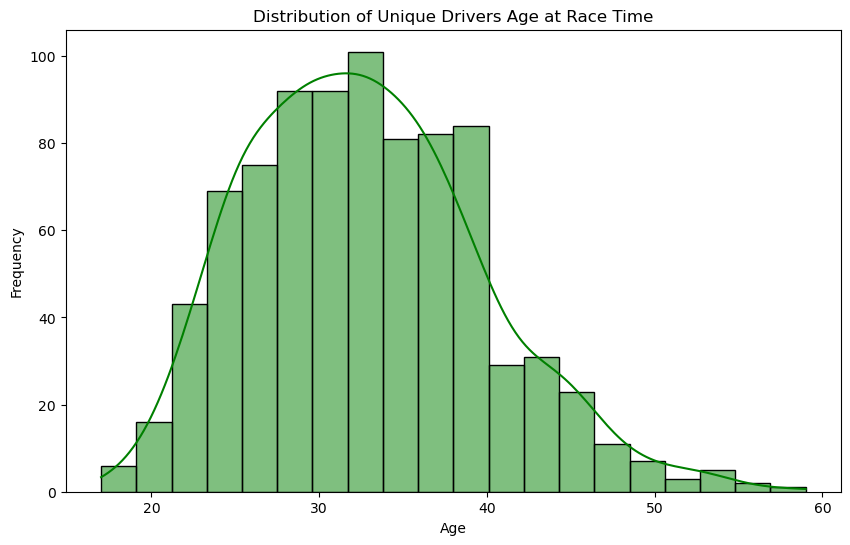

In [53]:
# Select the first occurrence of each driver
unique_drivers = df.drop_duplicates(subset='driver_name')

# Plot the distribution of unique drivers' age at race time
plt.figure(figsize=(10, 6))
sns.histplot(unique_drivers['drivers_age_at_race'], kde=True, color='green', bins=20)
plt.title('Distribution of Unique Drivers Age at Race Time')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The chart displays the distribution of unique drivers' ages at race time, showing a peak around 25-30 years, indicating that most drivers are in this age range during races. The distribution has a long right tail, suggesting fewer drivers compete at older ages (above 40). This highlights the concentration of drivers' careers during their younger years.

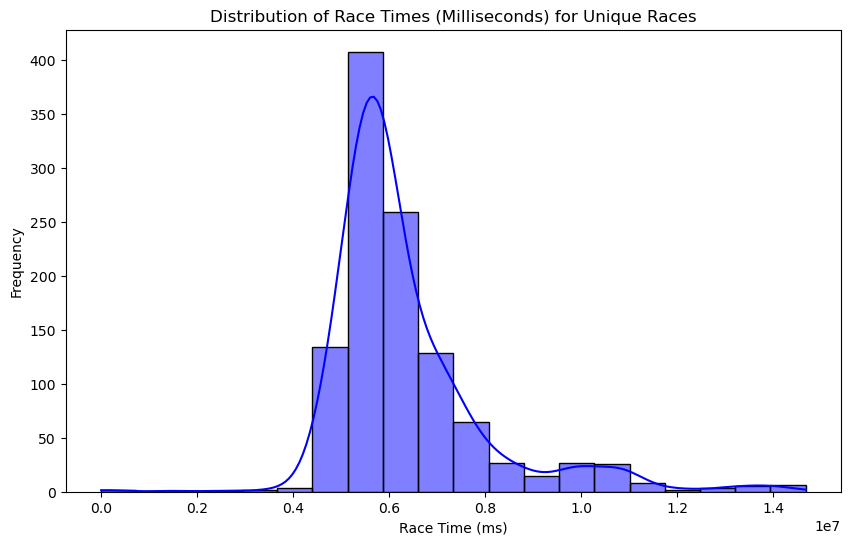

In [55]:
# Convert race_time_milliseconds to int64 (convert to numeric if it's a string)
df['race_time_milliseconds'] = pd.to_numeric(df['race_time_milliseconds'], errors='coerce')
# Select the first occurrence of each race
unique_races = df.drop_duplicates(subset='race_id')

# Plot the distribution of race times for unique races
plt.figure(figsize=(10, 6))
sns.histplot(unique_races['race_time_milliseconds'], kde=True, color='blue', bins=20)
plt.title('Distribution of Race Times (Milliseconds) for Unique Races')
plt.xlabel('Race Time (ms)')
plt.ylabel('Frequency')
plt.show()

The above plot shows the distribution of race times (in milliseconds) for unique races, with most race times clustering between 0.4e7 and 0.6e7 milliseconds. The distribution is slightly right-skewed, indicating a few races with longer times. This analysis helps identify typical race durations and anomalies.

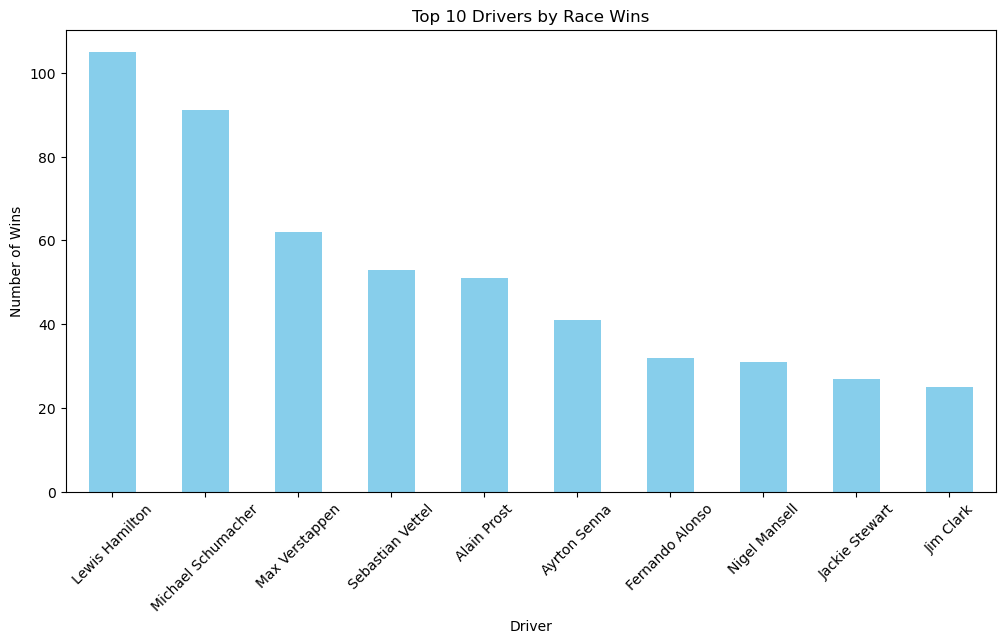

In [57]:
# Ensure the finishing_position column is clean
df['finishing_position'] = df['finishing_position'].astype(str).str.strip()

# Filter data for drivers who finished 1st
wins_df = df[df['finishing_position'] == '1']

# Group by driver and count wins
driver_wins_corrected = (
    wins_df.groupby('driver_name')['finishing_position']
    .count()
    .sort_values(ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(12, 6))
driver_wins_corrected.plot(kind='bar', color='skyblue')
plt.title('Top 10 Drivers by Race Wins')
plt.xlabel('Driver')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()

The bar chart highlights the top 10 drivers by race wins, with Lewis Hamilton leading, followed by Michael Schumacher and Max Verstappen. The distribution shows a sharp decline in wins beyond the top three drivers. This analysis emphasizes dominance by a few drivers in Formula 1 history.

Skewness of each numeric column:
result_id                -0.027069
race_id                   0.096087
driver_id                 1.001678
constructor_id            1.458395
starting_grid_position    0.203849
position_order            0.420536
driver_points             3.016043
laps_completed            0.694450
race_time_milliseconds    2.343221
status_id                 2.250060
season_year              -0.167001
race_round                0.343764
circuit_id                1.140386
driver_standings_id      -0.239688
constructor_points        4.378205
constructor_position      1.773931
winnings                  5.229246
drivers_age_at_race       0.666113
dtype: float64


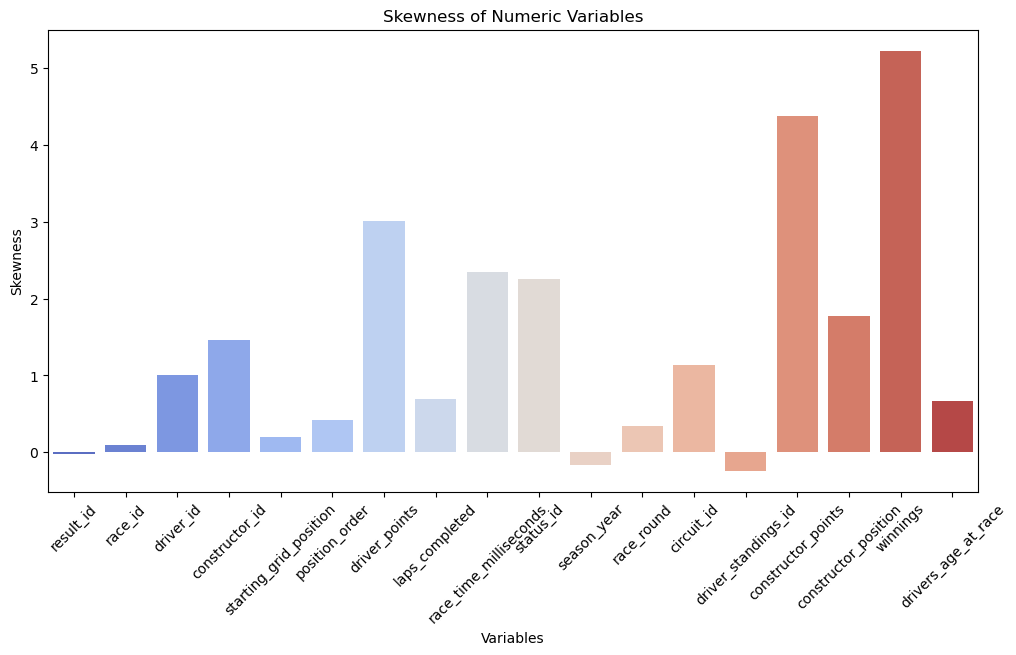

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate skewness for each numeric column
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
skewness = df[numeric_columns].skew()

# Print skewness values
print("Skewness of each numeric column:")
print(skewness)

# Plot skewness for all numeric variables
plt.figure(figsize=(12, 6))
sns.barplot(x=skewness.index, y=skewness.values, palette='coolwarm')
plt.title('Skewness of Numeric Variables')
plt.xlabel('Variables')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.show()

The chart visualizes the skewness of numeric variables, showing how their distributions deviate from symmetry. Variables like winnings and constructor_points are highly positively skewed, suggesting outliers or long tails.

In [61]:
import pandas as pd
df['fastest_lap_speed'] = pd.to_numeric(df['fastest_lap_speed'], errors='coerce')
# Convert fastest_lap to float64 (assuming it's a numeric value)
df['fastest_lap'] = pd.to_numeric(df['fastest_lap'], errors='coerce')

# Convert driver_rank to int64 (if it contains any non-numeric values like "N/A", we will handle that)
df['driver_rank'] = pd.to_numeric(df['driver_rank'], errors='coerce')

# Convert finishing_position to int64 (if it contains position like "1st", "2nd", remove the suffix)
df['finishing_position'] = df['finishing_position'].replace({r'(st|nd|rd|th)': ''}, regex=True)
df['finishing_position'] = pd.to_numeric(df['finishing_position'], errors='coerce')

# Check the results
print(df.dtypes)

result_id                      int64
race_id                        int64
driver_id                      int64
constructor_id                 int64
driver_number                 object
starting_grid_position         int64
finishing_position           float64
position_text                 object
position_order                 int64
driver_points                float64
laps_completed                 int64
race_time_milliseconds       float64
fastest_lap                  float64
driver_rank                  float64
fastest_lap_time              object
fastest_lap_speed            float64
status_id                      int64
race_status                   object
driver_nationality            object
season_year                    int64
race_round                     int64
circuit_id                     int64
circuit_name                  object
constructor_name              object
constructor_nationality       object
driver_standings_id            int64
constructor_points           float64
c

In [62]:
df

,result_id,race_id,driver_id,constructor_id,driver_number,starting_grid_position,finishing_position,position_text,position_order,driver_points,laps_completed,race_time_milliseconds,fastest_lap,driver_rank,fastest_lap_time,fastest_lap_speed,status_id,race_status,driver_nationality,season_year,race_round,circuit_id,circuit_name,constructor_name,constructor_nationality,driver_standings_id,constructor_points,constructor_position,constructor_position_text,winnings,driver_name,drivers_age_at_race
0,1,18,1,1,22,1,1.0,1,1,10.0,58,5690616.0,39.0,2.0,1:27.452,218.300,1,Finished,British,2008,1,1,Australian Grand Prix,McLaren,British,1,10.0,1,1,1,Lewis Hamilton,23.0
1,2,18,2,2,3,5,2.0,2,2,8.0,58,5696094.0,41.0,3.0,1:27.739,217.586,1,Finished,German,2008,1,1,Australian Grand Prix,BMW Sauber,German,2,8.0,2,2,0,Nick Heidfeld,31.0
2,3,18,3,3,7,7,3.0,3,3,6.0,58,5698779.0,41.0,5.0,1:28.090,216.719,1,Finished,German,2008,1,1,Australian Grand Prix,Williams,British,3,6.0,3,3,0,Nico Rosberg,23.0
3,4,18,4,4,5,11,4.0,4,4,5.0,58,5707797.0,58.0,7.0,1:28.603,215.464,1,Finished,Spanish,2008,1,1,Australian Grand Prix,Alpine F1,French,4,5.0,4,4,0,Fernando Alonso,27.0
4,5,18,5,1,23,3,5.0,5,5,4.0,58,5708630.0,43.0,1.0,1:27.418,218.385,1,Finished,Finnish,2008,1,1,Australian Grand Prix,McLaren,British,5,4.0,5,5,0,Heikki Kovalainen,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26245,26720,1142,859,215,30,14,16.0,16,16,0.0,50,5016974.0,45.0,17.0,1:36.980,230.187,1,Finished,New Zealander,2024,22,80,Las Vegas Grand Prix,RB F1 Team,Italian,73223,4.0,20,20,0,Liam Lawson,23.0
26246,26721,1142,839,214,31,11,17.0,17,17,0.0,49,NaN,47.0,9.0,1:36.511,231.306,11,+1 Lap,French,2024,22,80,Las Vegas Grand Prix,Alpine F1,French,73217,23.0,14,14,0,Esteban Ocon,28.0
26247,26722,1142,822,15,77,19,18.0,18,18,0.0,49,NaN,46.0,14.0,1:36.601,231.090,11,+1 Lap,Finnish,2024,22,80,Las Vegas Grand Prix,Alfa Romeo,Swiss,73219,0.0,23,23,0,Valtteri Bottas,35.0
26248,26723,1142,848,3,23,17,NaN,R,19,0.0,25,NaN,21.0,19.0,1:38.008,227.773,21,Radiator,Thai,2024,22,80,Las Vegas Grand Prix,Williams,British,73215,12.0,16,16,0,Alexander Albon,29.0


In [63]:
# Get the list of numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Get the list of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the lists
print("Numerical Variables:", numerical_columns)
print("Categorical Variables:", categorical_columns)

Numerical Variables: ['result_id', 'race_id', 'driver_id', 'constructor_id', 'starting_grid_position', 'finishing_position', 'position_order', 'driver_points', 'laps_completed', 'race_time_milliseconds', 'fastest_lap', 'driver_rank', 'fastest_lap_speed', 'status_id', 'season_year', 'race_round', 'circuit_id', 'driver_standings_id', 'constructor_points', 'constructor_position', 'winnings', 'drivers_age_at_race']
Categorical Variables: ['driver_number', 'position_text', 'fastest_lap_time', 'race_status', 'driver_nationality', 'circuit_name', 'constructor_name', 'constructor_nationality', 'constructor_position_text', 'driver_name']


The code removes the columns constructor_position_text and position_text from the DataFrame. It then converts the driver_number and finishing_position columns to numeric format, coercing invalid values to NaN and downcasting to the smallest possible integer type.

In [65]:
df.drop(['constructor_position_text', 'position_text'], axis=1, inplace=True)
df['driver_number'] = pd.to_numeric(df['driver_number'], errors='coerce', downcast='integer')
df['finishing_position'] = pd.to_numeric(df['finishing_position'], errors='coerce', downcast='integer')

The code converts column of fastest lap times in the format MM:SS.MSS to milliseconds by first appending a zero-hour prefix (00:) and converting the string to a timedelta format. The lap times are then converted into milliseconds by multiplying the total seconds by 1000, creating a new column. After displaying the processed times, the original fastest_lap_time column is dropped to leave only the millisecond values.

In [67]:
import pandas as pd

# Sample data
data = {'fastest_lap_time': ['1:27.453', '1:32.678', '1:29.234', '1:31.564']}
df_sample = pd.DataFrame(data)

# Convert 'fastest_lap_time' to timedelta by prepending '00:' to handle the format MM:SS.MSS
df['fastest_lap_time'] = '00:' + df['fastest_lap_time']

# Convert to timedelta
df['fastest_lap_time'] = pd.to_timedelta(df['fastest_lap_time'])

# Convert to milliseconds (multiply total seconds by 1000)
df['fastest_lap_time_ms'] = df['fastest_lap_time'].dt.total_seconds() * 1000

# Display the result
print(df[['fastest_lap_time', 'fastest_lap_time_ms']])
# Drop the 'fastest_lap_time' column
df.drop(columns=['fastest_lap_time'], inplace=True)

            fastest_lap_time  fastest_lap_time_ms
0     0 days 00:01:27.452000              87452.0
1     0 days 00:01:27.739000              87739.0
2     0 days 00:01:28.090000              88090.0
3     0 days 00:01:28.603000              88603.0
4     0 days 00:01:27.418000              87418.0
...                      ...                  ...
26245 0 days 00:01:36.980000              96980.0
26246 0 days 00:01:36.511000              96511.0
26247 0 days 00:01:36.601000              96601.0
26248 0 days 00:01:38.008000              98008.0
26249 0 days 00:01:38.314000              98314.0

[26250 rows x 2 columns]


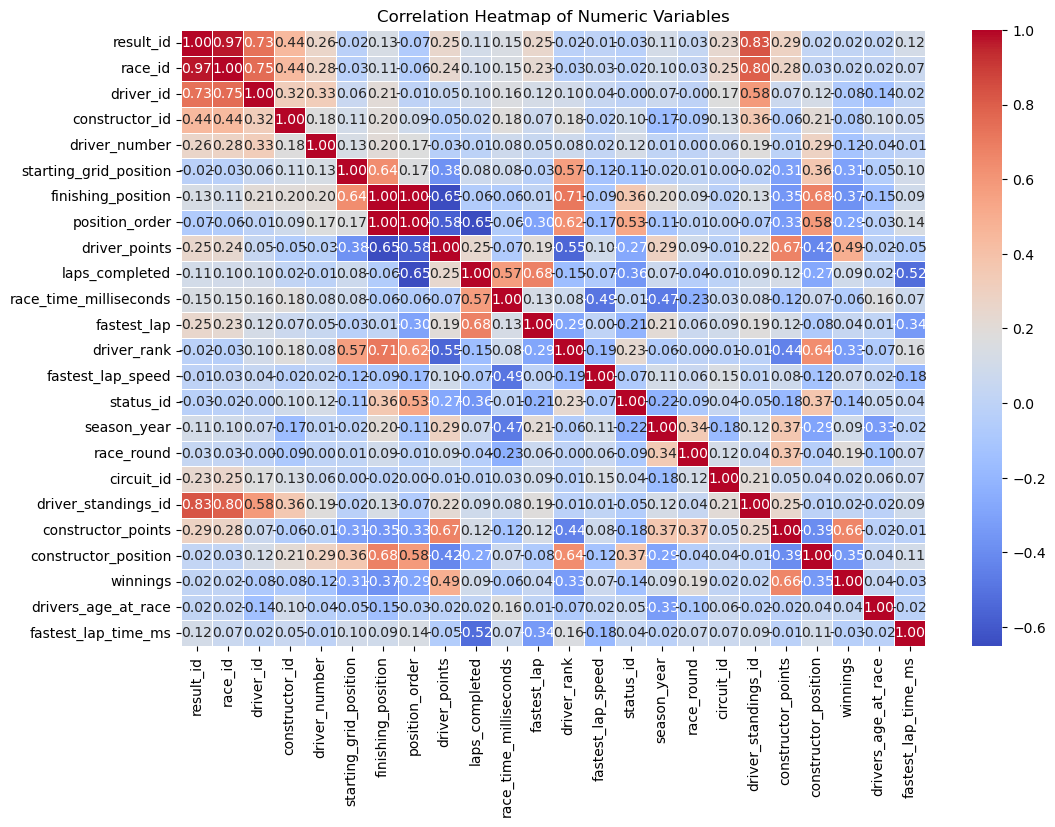

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numeric columns only
correlation_matrix = df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title and labels
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

The correlation heatmap highlights the relationships between numeric variables in the dataset. Variables like driver_points and constructor_points show a strong positive correlation, reflecting their interdependence in team performance. Fastest_lap_speed and fastest_lap_time exhibit a clear inverse relationship, aligning with racing dynamics.

The Below code fills missing values for numeric columns: driver_number with 0, finishing_position with -1, and driver_rank with -1, reflecting specific conditions like DNF (Did Not Finish).

It conditionally fills missing values for performance-related metrics (fastest_lap_speed, fastest_lap, fastest_lap_time_ms, and race_time_milliseconds) based on related columns or uses median values when applicable.

In [71]:
df['driver_number'].fillna(0, inplace=True)  # Fill missing driver numbers with 0
df['finishing_position'].fillna(-1, inplace=True)  # Fill finishing positions with -1 for DNF
# Fill missing 'driver_rank' values with -1
df['driver_rank'].fillna(-1, inplace=True)
import numpy as np

# Handle 'fastest_lap_speed' conditionally
df['fastest_lap_speed'] = np.where(
    pd.notnull(df['fastest_lap']),  # Condition: 'fastest_lap' is not null
    df['fastest_lap_speed'].fillna(df['fastest_lap_speed'].median()),  # Fill 'fastest_lap_speed' with median if 'fastest_lap' is not null
    0  # Otherwise, set 'fastest_lap_speed' to 0
)

# Handle 'fastest_lap' conditionally
df['fastest_lap'] = df['fastest_lap'].fillna(0)  # Fill any remaining missing 'fastest_lap' with 0

# Handle 'fastest_lap_time' conditionally
df['fastest_lap_time_ms'] = np.where(
    pd.notnull(df['fastest_lap']),  # Condition: 'fastest_lap' is not null
    df['fastest_lap_time_ms'].fillna(df['fastest_lap_time_ms'].median()),  # Fill missing 'fastest_lap_time' with median if 'fastest_lap' is not null
    0  # Otherwise, leave 'fastest_lap_time' unchanged (null or existing value)
)

# Conditional filling of 'race_time_milliseconds'
df['race_time_milliseconds'] = df.apply(
    lambda row: df['race_time_milliseconds'].median() if pd.isna(row['race_time_milliseconds']) and pd.notna(row['laps_completed']) else row['race_time_milliseconds'],
    axis=1
)


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26250 entries, 0 to 26249
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   result_id                26250 non-null  int64  
 1   race_id                  26250 non-null  int64  
 2   driver_id                26250 non-null  int64  
 3   constructor_id           26250 non-null  int64  
 4   driver_number            26250 non-null  float64
 5   starting_grid_position   26250 non-null  int64  
 6   finishing_position       26250 non-null  float64
 7   position_order           26250 non-null  int64  
 8   driver_points            26250 non-null  float64
 9   laps_completed           26250 non-null  int64  
 10  race_time_milliseconds   26250 non-null  float64
 11  fastest_lap              26250 non-null  float64
 12  driver_rank              26250 non-null  float64
 13  fastest_lap_speed        26250 non-null  float64
 14  status_id             

In [73]:
df

,result_id,race_id,driver_id,constructor_id,driver_number,starting_grid_position,finishing_position,position_order,driver_points,laps_completed,race_time_milliseconds,fastest_lap,driver_rank,fastest_lap_speed,status_id,race_status,driver_nationality,season_year,race_round,circuit_id,circuit_name,constructor_name,constructor_nationality,driver_standings_id,constructor_points,constructor_position,winnings,driver_name,drivers_age_at_race,fastest_lap_time_ms
0,1,18,1,1,22.0,1,1.0,1,10.0,58,5690616.0,39.0,2.0,218.300,1,Finished,British,2008,1,1,Australian Grand Prix,McLaren,British,1,10.0,1,1,Lewis Hamilton,23.0,87452.0
1,2,18,2,2,3.0,5,2.0,2,8.0,58,5696094.0,41.0,3.0,217.586,1,Finished,German,2008,1,1,Australian Grand Prix,BMW Sauber,German,2,8.0,2,0,Nick Heidfeld,31.0,87739.0
2,3,18,3,3,7.0,7,3.0,3,6.0,58,5698779.0,41.0,5.0,216.719,1,Finished,German,2008,1,1,Australian Grand Prix,Williams,British,3,6.0,3,0,Nico Rosberg,23.0,88090.0
3,4,18,4,4,5.0,11,4.0,4,5.0,58,5707797.0,58.0,7.0,215.464,1,Finished,Spanish,2008,1,1,Australian Grand Prix,Alpine F1,French,4,5.0,4,0,Fernando Alonso,27.0,88603.0
4,5,18,5,1,23.0,3,5.0,5,4.0,58,5708630.0,43.0,1.0,218.385,1,Finished,Finnish,2008,1,1,Australian Grand Prix,McLaren,British,5,4.0,5,0,Heikki Kovalainen,26.0,87418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26245,26720,1142,859,215,30.0,14,16.0,16,0.0,50,5016974.0,45.0,17.0,230.187,1,Finished,New Zealander,2024,22,80,Las Vegas Grand Prix,RB F1 Team,Italian,73223,4.0,20,0,Liam Lawson,23.0,96980.0
26246,26721,1142,839,214,31.0,11,17.0,17,0.0,49,5790372.0,47.0,9.0,231.306,11,+1 Lap,French,2024,22,80,Las Vegas Grand Prix,Alpine F1,French,73217,23.0,14,0,Esteban Ocon,28.0,96511.0
26247,26722,1142,822,15,77.0,19,18.0,18,0.0,49,5790372.0,46.0,14.0,231.090,11,+1 Lap,Finnish,2024,22,80,Las Vegas Grand Prix,Alfa Romeo,Swiss,73219,0.0,23,0,Valtteri Bottas,35.0,96601.0
26248,26723,1142,848,3,23.0,17,-1.0,19,0.0,25,5790372.0,21.0,19.0,227.773,21,Radiator,Thai,2024,22,80,Las Vegas Grand Prix,Williams,British,73215,12.0,16,0,Alexander Albon,29.0,98008.0


Applying label encoding to the categorical columns race_status, driver_nationality, circuit_name, constructor_name, constructor_nationality, and driver_name by converting their string values into integer representations. It iterates through the specified columns, using LabelEncoder to transform each column, ensuring all data types are converted to strings before encoding.

In [75]:
from sklearn.preprocessing import LabelEncoder

# Categorical Variables to be label encoded
label_columns = ['race_status', 'driver_nationality', 'circuit_name', 'constructor_name', 'constructor_nationality','driver_name']

# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding
for col in label_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Check the transformed DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26250 entries, 0 to 26249
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   result_id                26250 non-null  int64  
 1   race_id                  26250 non-null  int64  
 2   driver_id                26250 non-null  int64  
 3   constructor_id           26250 non-null  int64  
 4   driver_number            26250 non-null  float64
 5   starting_grid_position   26250 non-null  int64  
 6   finishing_position       26250 non-null  float64
 7   position_order           26250 non-null  int64  
 8   driver_points            26250 non-null  float64
 9   laps_completed           26250 non-null  int64  
 10  race_time_milliseconds   26250 non-null  float64
 11  fastest_lap              26250 non-null  float64
 12  driver_rank              26250 non-null  float64
 13  fastest_lap_speed        26250 non-null  float64
 14  status_id             

In [76]:
# Importing necessary libraries for regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

The three models (Linear Regression, Random Forest Regressor, and Decision Tree Regressor) were considered because they are well-suited for predicting continuous variables and offer diverse approaches to modeling data.

MSE gives an absolute measure of error, while R² provides a relative measure of how well the model explains the variance in the data. Both are essential for comprehensively understanding model performance in regression tasks.

In [78]:
# Splitting data into features and target variable
X = df.drop('driver_points', axis=1)  # Features (all columns except 'driver_points')
y = df['driver_points']  # Target variable (continuous)

In [79]:
# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression R^2: {r2_linear}")

Linear Regression MSE: 5.327193398532061
Linear Regression R^2: 0.7128298271820301


The Linear Regression model was trained on an 80-20 train-test split. The model achieved a Mean Squared Error (MSE) of **5.33**, indicating the average squared difference between actual and predicted values. The R² score of **0.71** reflects that the model explains 71% of the variance in the target variable on the test set.

In [82]:
# Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R^2: {r2_rf}")

Random Forest MSE: 0.08124470650476193
Random Forest R^2: 0.9956203849452985


The Random Forest Regressor, trained on the same 80-20 split, outperformed Linear Regression with a significantly lower Mean Squared Error (MSE) of **0.081**, showing a much smaller average error in predictions. Its R² score of **0.996** indicates that the model explains 99.6% of the variance in the target variable, demonstrating near-perfect predictive performance.

In [84]:
# Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree MSE: {mse_dt}")
print(f"Decision Tree R^2: {r2_dt}")

Decision Tree MSE: 0.2282492952380952
Decision Tree R^2: 0.9876958869979894


The Decision Tree Regressor achieved a Mean Squared Error (MSE) of **0.228**, reflecting a low average prediction error, and an R² score of **0.988**, indicating that it explains 98.8% of the variance in the target variable. While slightly less accurate than the Random Forest, it still provides highly reliable predictions.

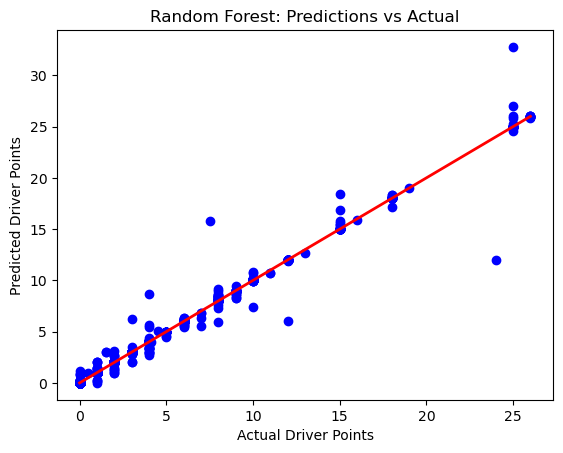

In [86]:
import matplotlib.pyplot as plt

# Plotting predictions vs actual values for the best model (e.g., Random Forest)
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Random Forest: Predictions vs Actual')
plt.xlabel('Actual Driver Points')
plt.ylabel('Predicted Driver Points')
plt.show()

The scatter plot displays individual predictions in blue, while the red line represents the ideal case where predictions match actual values perfectly, helping assess the model's accuracy and bias.

The steps involve scaling the features and using polynomial regression to improve model performance for predicting driver points:
Scaling Features: StandardScaler was used to normalize the features, ensuring that all variables contribute equally to the model and preventing any single feature from dominating due to larger scales. This is especially crucial when applying polynomial transformations.

Polynomial Features: A second-degree polynomial transformation was applied to capture non-linear relationships between features and the target variable (driver_points). This enriches the feature set by including interaction and squared terms.

In [89]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X and y are the feature matrix and target vector respectively
# X = df.drop('driver_points', axis=1)  # Features
# y = df['driver_points']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now we can use X_train_scaled and X_test_scaled in the models

In [90]:
# Generate polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train_scaled)

# Create and train the model
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

# Predict and evaluate the model
y_pred_poly = poly_model.predict(X_poly)
print(f"Polynomial Linear Regression R^2: {poly_model.score(X_poly, y_train)}")

Polynomial Linear Regression R^2: 0.9538314983593382


The Polynomial Linear Regression model achieved an R² score of 0.954, indicating that 95.4% of the variance in the data is explained by the model, demonstrating its ability to capture complex patterns in the data.

In [92]:
# Splitting data into features and target variable
X = df.drop('driver_points', axis=1)  # Features (all columns except 'driver_points')
y = df['driver_points']  # Target variable (continuous)

In [93]:
# Splitting the data into training and testing sets (50% training, 50% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [94]:
# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression R^2: {r2_linear}")

Linear Regression MSE: 5.0867526350300905
Linear Regression R^2: 0.7290142043141128


In [95]:
# Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R^2: {r2_rf}")

Random Forest MSE: 0.0957784342902857
Random Forest R^2: 0.994897610108468


In [96]:
# Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree MSE: {mse_dt}")
print(f"Decision Tree R^2: {r2_dt}")

Decision Tree MSE: 0.16504289523809523
Decision Tree R^2: 0.9912076950665141


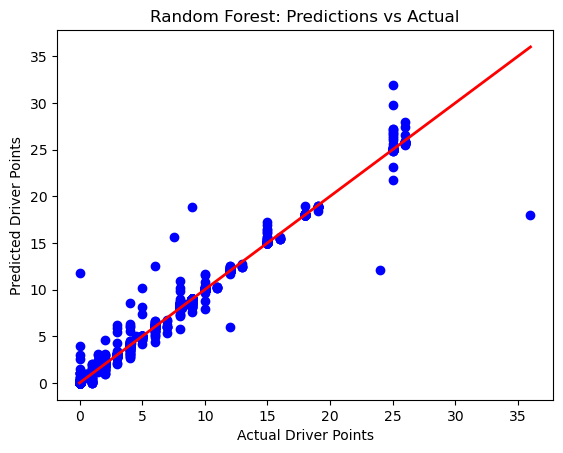

In [97]:
import matplotlib.pyplot as plt

# Plotting predictions vs actual values for the best model (e.g., Random Forest)
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Random Forest: Predictions vs Actual')
plt.xlabel('Actual Driver Points')
plt.ylabel('Predicted Driver Points')
plt.show()

In [98]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X and y are the feature matrix and target vector respectively
# X = df.drop('driver_points', axis=1)  # Features
# y = df['driver_points']  # Target variable

# Split the dataset into training and testing sets (50% train, 50% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Scaling the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now we can use X_train_scaled and X_test_scaled in the models

In [99]:
# Generate polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train_scaled)

# Create and train the model
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

# Predict and evaluate the model
y_pred_poly = poly_model.predict(X_poly)
print(f"Polynomial Linear Regression R^2: {poly_model.score(X_poly, y_train)}")

Polynomial Linear Regression R^2: 0.9535789757138365
